Dataset Downloded from: https://www.tfcertification.com/pages/deep-learning-and-machine-learning-practical-workout 

Project #1: Artificial Neural Networks - Car Sales Prediction

In [1]:
#Imports
#Train test split
#Scaling of inputs

import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
y = car_df['Car Purchase Amount']
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_scaler = MinMaxScaler()

#Scaler only fit on X_train so that there is no leak from test set
#do not need to scale Y
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [7]:
#ANN training with early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), loss='mean_squared_error')

epochs_hist = model.fit(X_train, y_train, epochs=1000, batch_size=25,  verbose=0, validation_split=0.05, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


4/4 [==============================] - 0s 2ms/step
2.3164994582246643


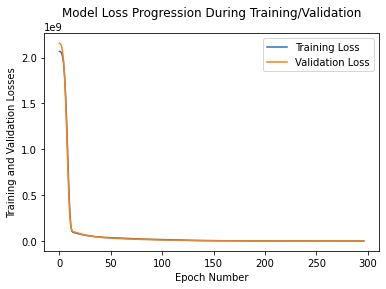

In [8]:
#Plot training and validation loss
#Calculate test RMSE

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

mse = mean_squared_error(y_test, model.predict(X_test))
print(math.sqrt(mse))

In [10]:
#Compare solution with xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import math

model = XGBRegressor()
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, model.predict(X_test))
print(math.sqrt(mse))

1955.747311438816
